In [ ]:
!pip install keras_preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.7 MB/s eta 0:00:00


In [ ]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/data/archive.zip

In [ ]:
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/validation'

In [ ]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels


In [ ]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

neutral completed
happy completed
surprise completed
disgust completed
angry completed
sad completed
fear completed


In [ ]:
print(train)

                                image    label
0      images/train/neutral/16582.jpg  neutral
1      images/train/neutral/12199.jpg  neutral
2      images/train/neutral/15911.jpg  neutral
3      images/train/neutral/21254.jpg  neutral
4        images/train/neutral/102.jpg  neutral
...                               ...      ...
28816      images/train/fear/4746.jpg     fear
28817     images/train/fear/17603.jpg     fear
28818      images/train/fear/5634.jpg     fear
28819     images/train/fear/29870.jpg     fear
28820      images/train/fear/8881.jpg     fear

[28821 rows x 2 columns]


In [ ]:
!pip install plotly

In [ ]:
import plotly.express as px

# Visualize the distribution of training data interactively
fig = px.bar(train['label'].value_counts(), x=train['label'].value_counts().index, y=train['label'].value_counts().values,
             color=train['label'].value_counts().index, labels={'y': 'Count', 'x': 'Emotion Labels'},
             title='Distribution of Training Data')
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()


In [ ]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

neutral completed
happy completed
surprise completed
disgust completed
angry completed
sad completed
fear completed


In [ ]:
print(test)
print(test['image'])

                                    image    label
0      images/validation/neutral/7008.jpg  neutral
1     images/validation/neutral/28539.jpg  neutral
2      images/validation/neutral/2149.jpg  neutral
3      images/validation/neutral/2207.jpg  neutral
4     images/validation/neutral/14342.jpg  neutral
...                                   ...      ...
7061     images/validation/fear/10758.jpg     fear
7062     images/validation/fear/26916.jpg     fear
7063     images/validation/fear/22485.jpg     fear
7064     images/validation/fear/28189.jpg     fear
7065     images/validation/fear/16374.jpg     fear

[7066 rows x 2 columns]
0        images/validation/neutral/7008.jpg
1       images/validation/neutral/28539.jpg
2        images/validation/neutral/2149.jpg
3        images/validation/neutral/2207.jpg
4       images/validation/neutral/14342.jpg
                       ...                 
7061       images/validation/fear/10758.jpg
7062       images/validation/fear/26916.jpg
7063       

In [ ]:
from tqdm.notebook import tqdm

In [ ]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,grayscale =  True )
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features


In [ ]:
train_features = extract_features(train['image'])

  0%|          | 0/28821 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [ ]:
test_features = extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning:

grayscale is deprecated. Please use color_mode = "grayscale"



In [ ]:
x_train = train_features/255.0
x_test = test_features/255.0

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [ ]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [ ]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [ ]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy' )

In [ ]:
model.fit(x= x_train,y = y_train, batch_size = 125, epochs = 15, validation_data = (x_test,y_test))

Epoch 1/15
231/231 [==============================] - 16s 52ms/step - loss: 0.8598 - accuracy: 0.6848 - val_loss: 1.0202 - val_accuracy: 0.6240
Epoch 2/15
231/231 [==============================] - 13s 55ms/step - loss: 0.8447 - accuracy: 0.6876 - val_loss: 1.0116 - val_accuracy: 0.6330
Epoch 3/15
231/231 [==============================] - 13s 56ms/step - loss: 0.8282 - accuracy: 0.6941 - val_loss: 1.0275 - val_accuracy: 0.6238
Epoch 4/15
231/231 [==============================] - 12s 53ms/step - loss: 0.8318 - accuracy: 0.6935 - val_loss: 1.0354 - val_accuracy: 0.6282
Epoch 5/15
231/231 [==============================] - 13s 54ms/step - loss: 0.8254 - accuracy: 0.6953 - val_loss: 1.0234 - val_accuracy: 0.6233
Epoch 6/15
231/231 [==============================] - 12s 52ms/step - loss: 0.8210 - accuracy: 0.6922 - val_loss: 1.0211 - val_accuracy: 0.6231
Epoch 7/15
231/231 [==============================] - 12s 53ms/step - loss: 0.8157 - accuracy: 0.6986 - val_loss: 1.0264 - val_accuracy:

In [ ]:
model_json = model.to_json()
with open("emotiondetection.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



In [ ]:
from keras.models import model_from_json

In [ ]:
json_file = open("facialemotionmodel.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("facialemotionmodel.h5")

In [ ]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [ ]:
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad
1/1 [==============================] - 0s 18ms/step
model prediction is  sad


original image is of sad
1/1 [==============================] - 0s 18ms/step
model prediction is  sad


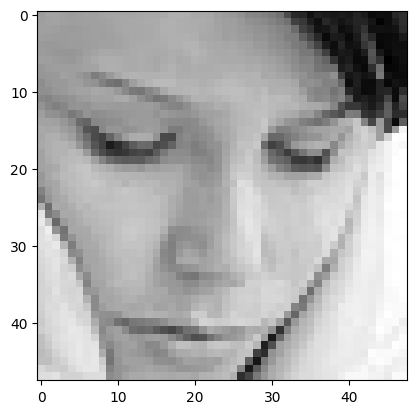

In [ ]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of fear
1/1 [==============================] - 0s 19ms/step
model prediction is  fear


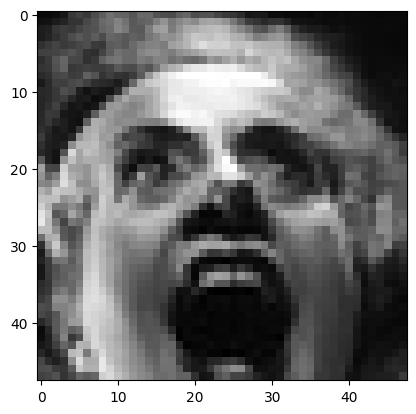

In [ ]:
image = 'images/train/fear/634.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of disgust
1/1 [==============================] - 0s 57ms/step
model prediction is  disgust


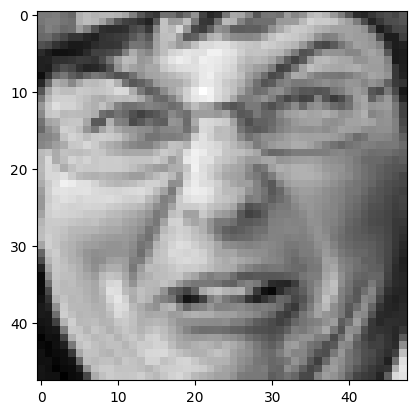

In [ ]:
image = 'images/train/disgust/299.jpg'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of happy
1/1 [==============================] - 0s 42ms/step
model prediction is  happy


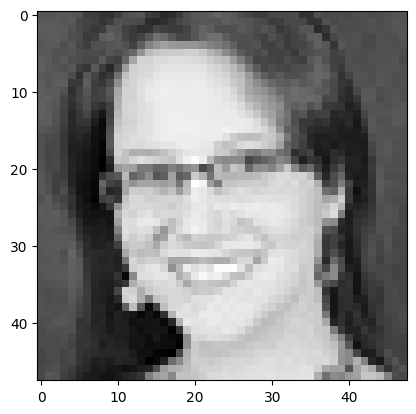

In [ ]:
image = 'images/train/happy/7.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of surprise
1/1 [==============================] - 0s 40ms/step
model prediction is  surprise


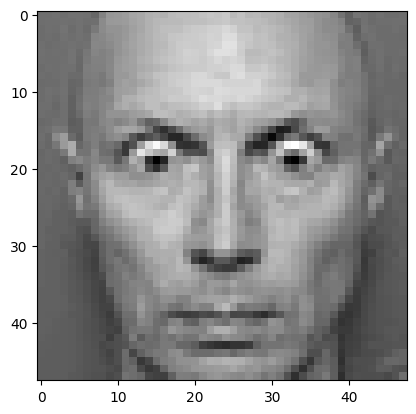

In [ ]:
image = 'images/train/surprise/15.jpg'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

221/221 [==============================] - 1s 4ms/step


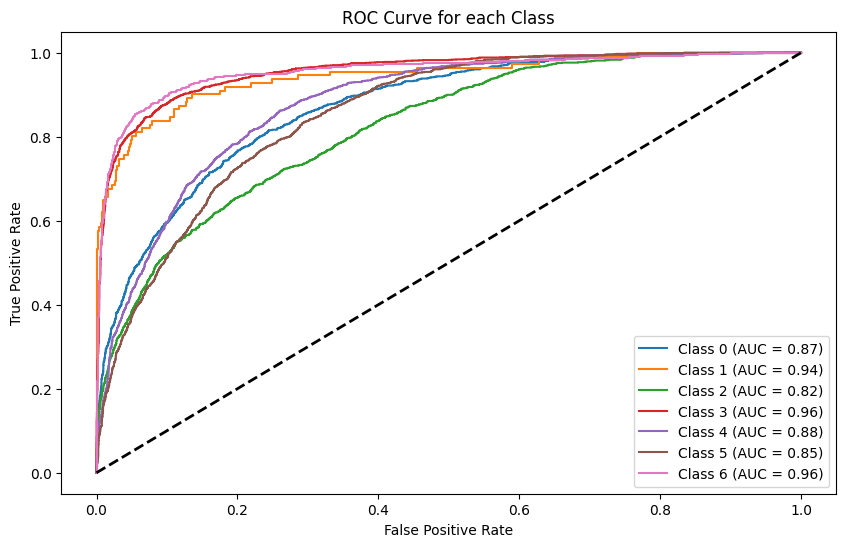

In [ ]:
from sklearn.metrics import roc_curve, auc


# Assuming you have already trained your model and made predictions on the test set
y_pred = model.predict(x_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(7):  # Assuming you have 7 classes
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(10, 6))

for i in range(7):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for each Class')
plt.legend(loc='lower right')
plt.show()
